In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import joblib

#Step 1 - Load dataset with correct delimiter
df = pd.read_csv(r"D:\CDUT Summer Camp\Summer Code\energy_data.txt", sep=';', low_memory=False, na_values='?')

# Combine date and time into timestamp
df['timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

# Drop rows with NaT timestamps or missing values in relevant columns
df.dropna(subset=['timestamp', 'Global_active_power'], inplace=True)

# Convert relevant columns to numeric
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')

# Drop remaining NaNs
df.dropna(inplace=True)

#Step 2 -  Feature engineering
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Seasonal feature (customize for your hemisphere)
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
           6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall',
           11: 'Fall', 12: 'Winter'}
df['season'] = df['month'].map(seasons)

# Features and target
features = ['hour', 'day_of_week', 'Voltage', 'is_weekend', 'month']
target = 'Global_active_power'

X = df[features]
y = df[target]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = XGBRegressor(n_estimators=50, max_depth=4, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * ((len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1))

print(f"✅ MAE: {mae:.3f}")
print(f"✅ MSE: {mse:.3f}")
# print(f"✅ Adjusted R² Score: {adjusted_r2:.3f}")
print(f"✅ RMSE: {rmse:.3f}")
print(f"✅ R² Score: {r2:.3f}")

# Save model
joblib.dump(model, r"D:\CDUT Summer Camp\Summer Code\model.pkl")
print("✅ Model saved as model.pkl")


✅ MAE: 0.573
✅ MSE: 0.646
✅ RMSE: 0.804
✅ R² Score: 0.425
✅ Model saved as model.pkl


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import os

C:\Users\Grace\anaconda1\envs\grace\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:

# Load dataset
df = pd.read_csv(r"D:\CDUT Summer Camp\Summer Code\energy_data.txt", sep=';', low_memory=False, na_values='?')

# Timestamp feature
df['timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
df.dropna(subset=['timestamp', 'Global_active_power'], inplace=True)

# Convert numeric columns
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(inplace=True)

# Time-based features
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['season'] = df['month'].map({
    1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall',
    11: 'Fall', 12: 'Winter'
})

In [4]:

features = ['hour', 'day_of_week', 'Voltage', 'Global_intensity',
            'is_weekend', 'month', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
target = 'Global_active_power'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.05,
                     subsample=0.8, colsample_bytree=0.8, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
residuals = y_test - y_pred

print(f"✅ MAE: {mae:.3f}")
print(f"✅ MSE: {mse:.3f}")
print(f"✅ RMSE: {rmse:.3f}")
print(f"✅ R² Score: {r2:.3f}")

# Save model
joblib.dump(model, r"D:\CDUT Summer Camp\Summer Code\model.pkl")
print("✅ Model saved as model.pkl")

✅ MAE: 0.027
✅ MSE: 0.002
✅ RMSE: 0.041
✅ R² Score: 0.998
✅ Model saved as model.pkl


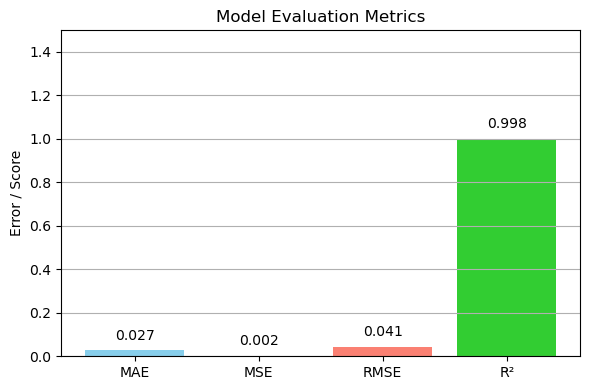

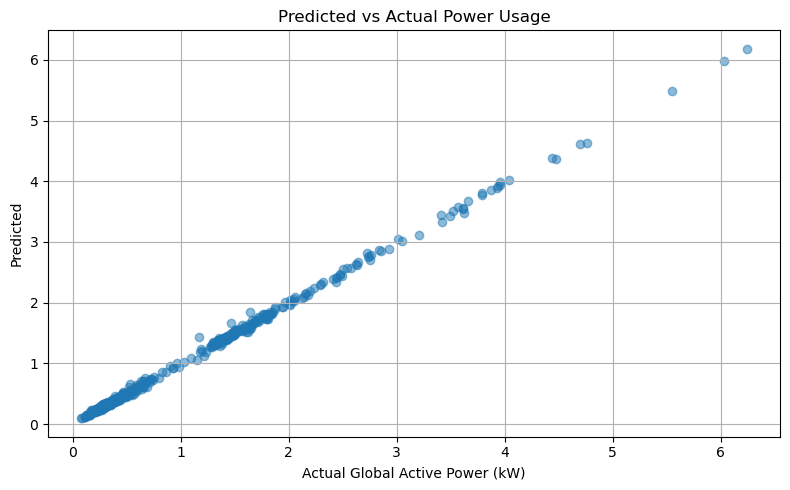

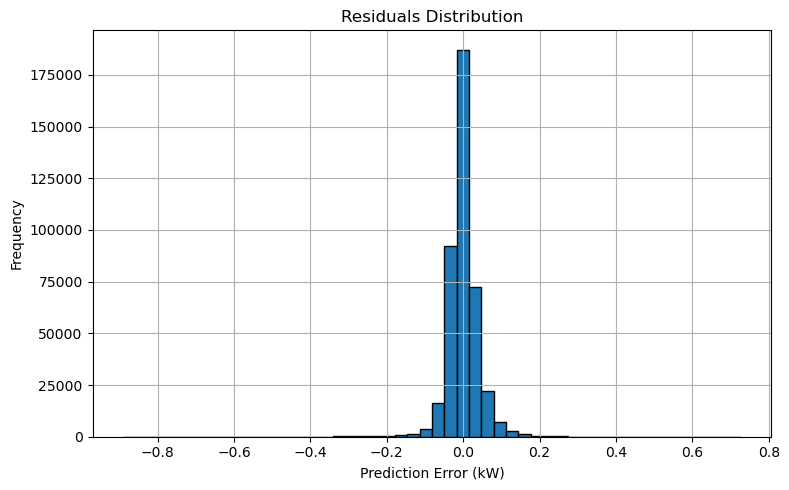

In [10]:

plt.figure(figsize=(6, 4))
plt.bar(['MAE', 'MSE', 'RMSE', 'R²'], [mae, mse, rmse, r2], color=['skyblue', 'purple', 'salmon', 'limegreen'])
plt.title("Model Evaluation Metrics")
plt.ylabel("Error / Score")
plt.ylim(0, max(mae, mse, rmse, r2) + 0.5)
for i, v in enumerate([mae, mse, rmse, r2]):
    plt.text(i, v + 0.05, f"{v:.3f}", ha='center', fontsize=10)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("evaluation_metrics.png")
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(y_test[:500], y_pred[:500], alpha=0.5)
plt.xlabel("Actual Global Active Power (kW)")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual Power Usage")
plt.grid(True)
plt.tight_layout()
plt.savefig("predicted_vs_actual.png")
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error (kW)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.savefig("residuals_distribution.png")
plt.show()

In [7]:
!pip install slicer
!pip install numba

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:1129)'))) - skipping
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:1129)'))) - skipping


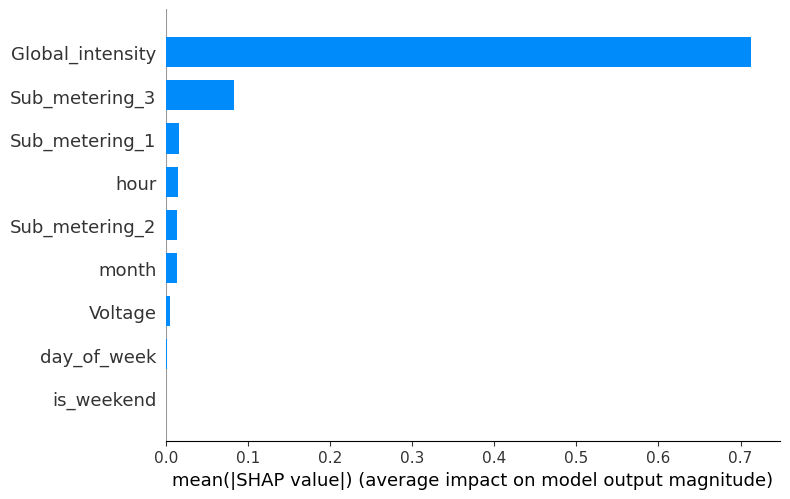

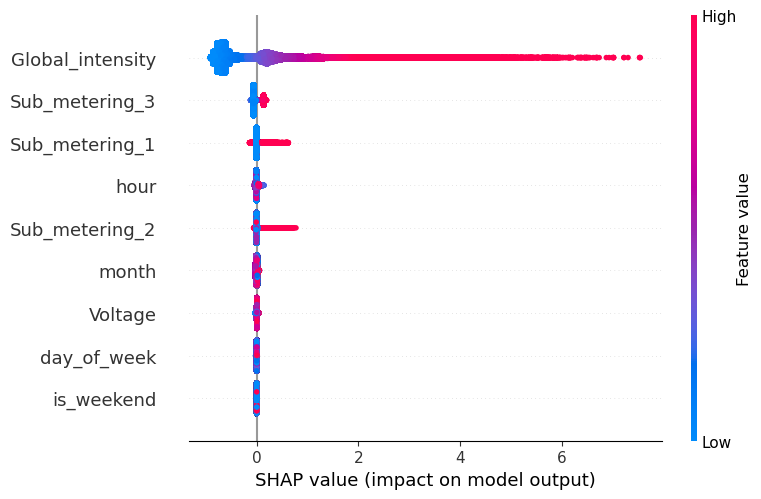

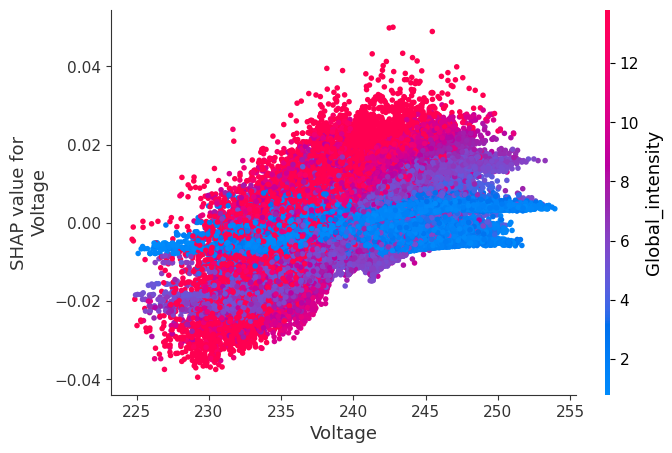

In [8]:
import shap
import matplotlib.pyplot as plt

explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

# Dependence plot for top feature
shap.dependence_plot("Voltage", shap_values.values, X_test)


100%|===================| 409576/409856 [15:33<00:00]        

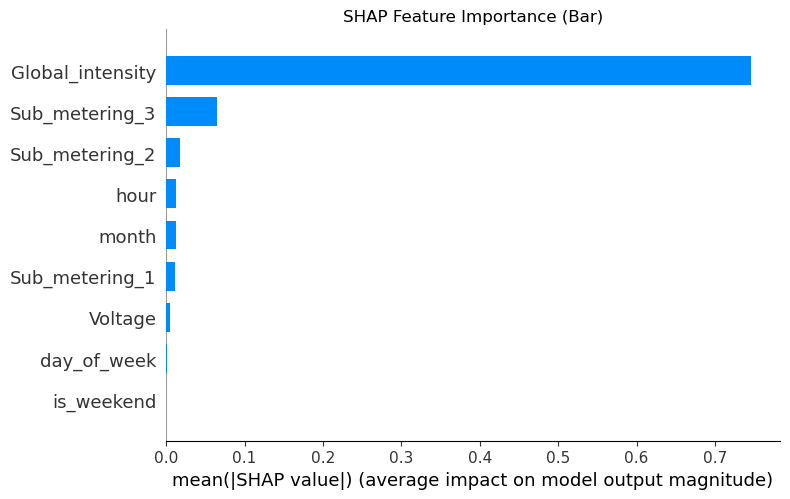

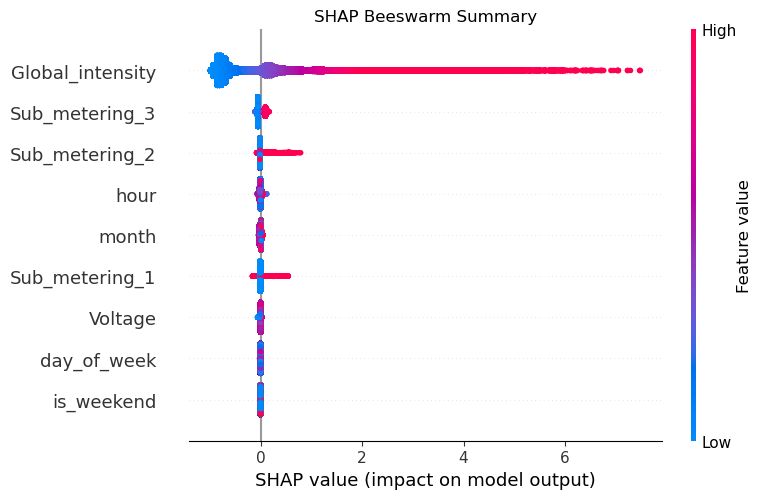

<Figure size 640x480 with 0 Axes>

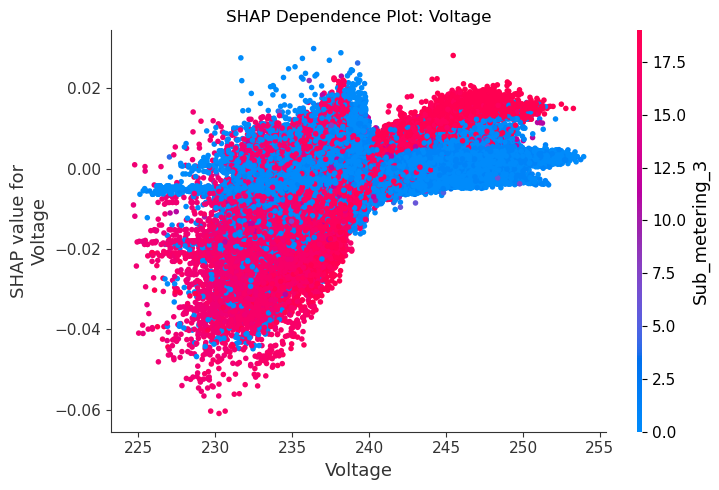

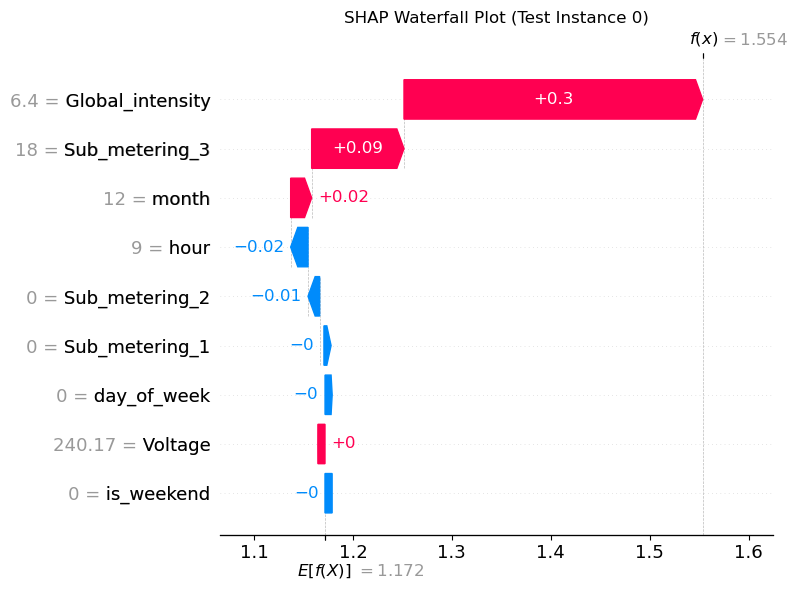

In [9]:
import shap
import matplotlib.pyplot as plt

# Create SHAP explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# --- 1. SHAP Bar Summary Plot ---
plt.figure()
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Bar)")
plt.tight_layout()
plt.savefig("shap_bar_plot.png")  # Optional
plt.show()

# --- 2. SHAP Beeswarm Summary Plot ---
plt.figure()
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Beeswarm Summary")
plt.tight_layout()
plt.savefig("shap_summary_plot.png")  # Optional
plt.show()

# --- 3. SHAP Dependence Plot (Top Feature: Voltage) ---
plt.figure()
shap.dependence_plot("Voltage", shap_values.values, X_test, show=False)
plt.title("SHAP Dependence Plot: Voltage")
plt.tight_layout()
plt.savefig("shap_dependence_voltage.png")  # Optional
plt.show()

# --- 4. SHAP Waterfall Plot (1st Test Instance) ---
plt.figure()
shap.plots.waterfall(shap_values[0], show=False)
plt.title("SHAP Waterfall Plot (Test Instance 0)")
plt.tight_layout()
plt.savefig("shap_waterfall_plot.png")  # Optional
plt.show()

# --- 5. SHAP Force Plot (Test Instance 0) ---
# Note: Force plot requires JS rendering. You can save as HTML or render inline in notebooks.
shap.initjs()  # Enable JS visualizations (only for notebook/Jupyter)
force_plot = shap.plots.force(shap_values[0])

# Optional: Save force plot as standalone HTML
shap.save_html("shap_force_plot.html", force_plot)
